<a href="https://colab.research.google.com/github/shaad4224/credit_card_default_prediction/blob/main/Copy_of_credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/capstone/default of credit card clients.xls - Data.xlsx - default of credit card clients..csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

<Axes: xlabel='IsDefaulter', ylabel='count'>

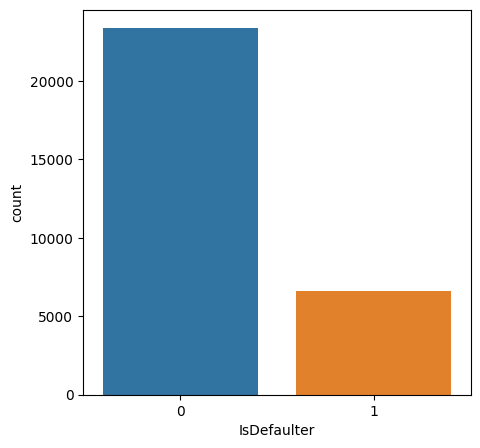

In [ ]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

<Axes: xlabel='SEX', ylabel='count'>

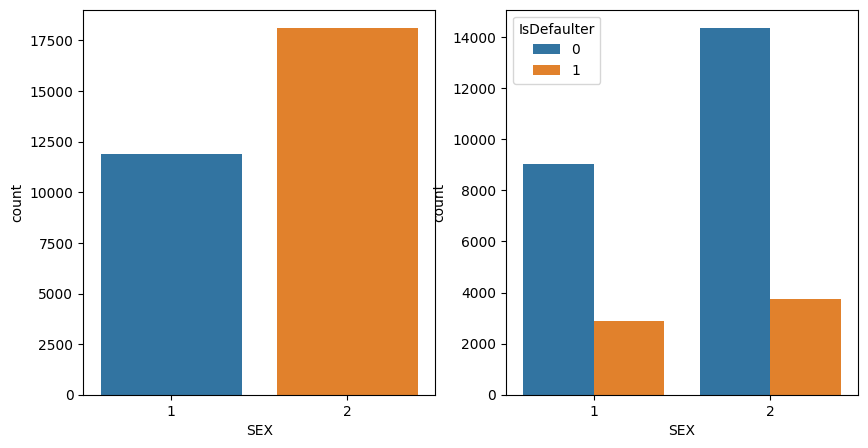

In [ ]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

In [ ]:
#category wise values
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

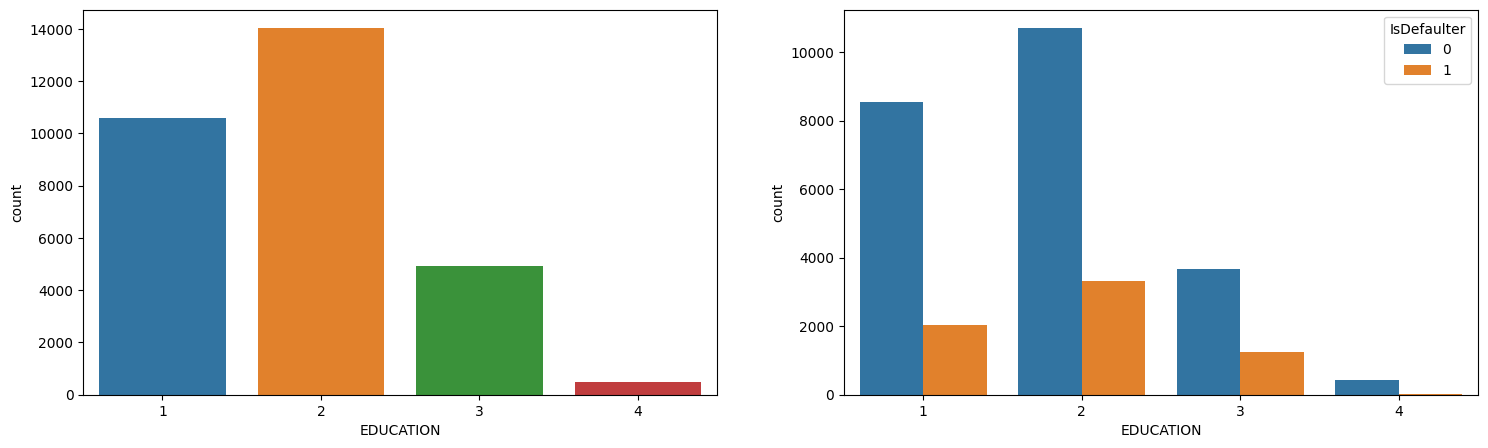

In [ ]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

In [ ]:
#category wise values
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

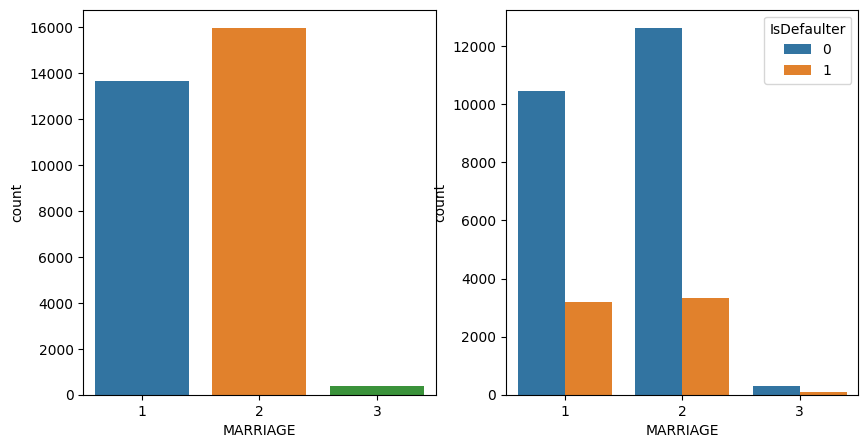

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

In [ ]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

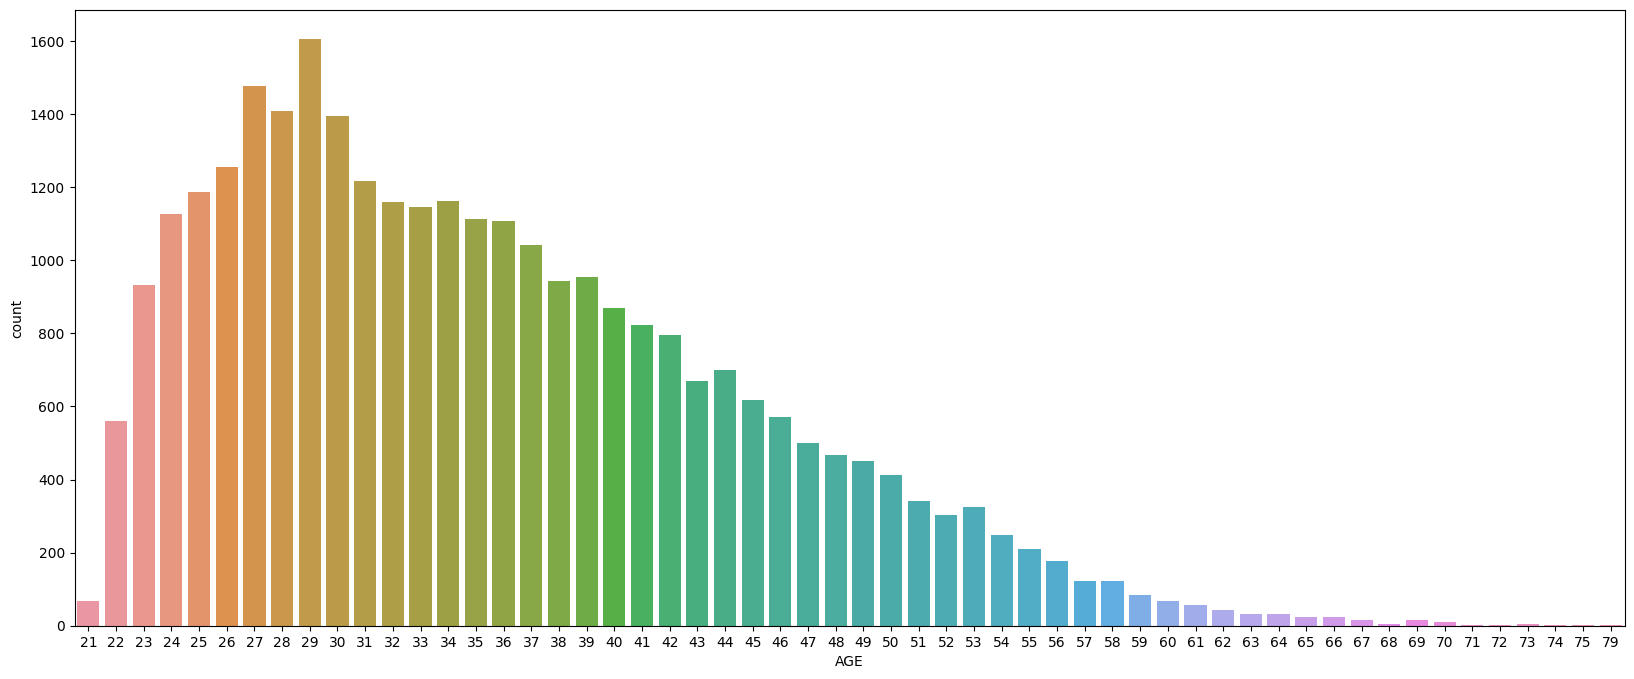

In [ ]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

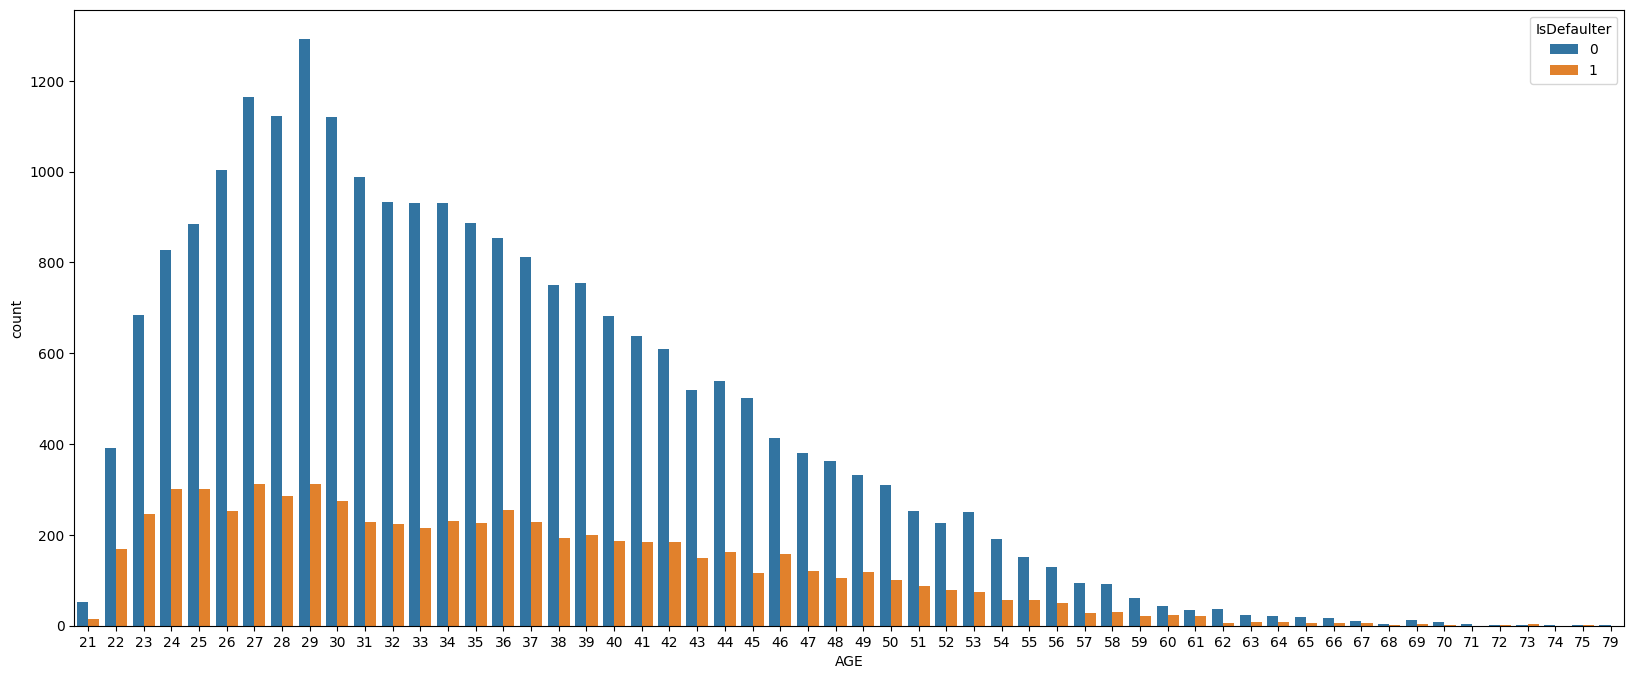

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

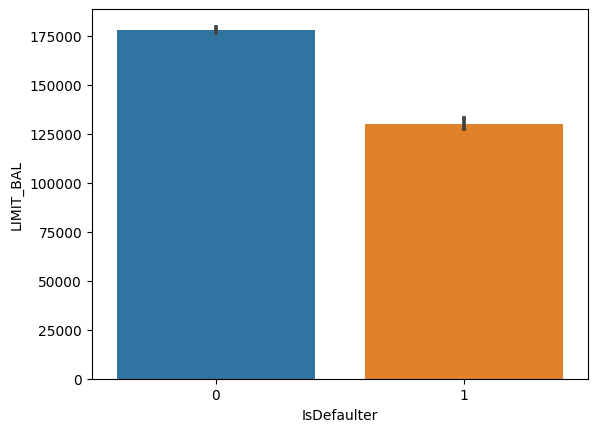

In [ ]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

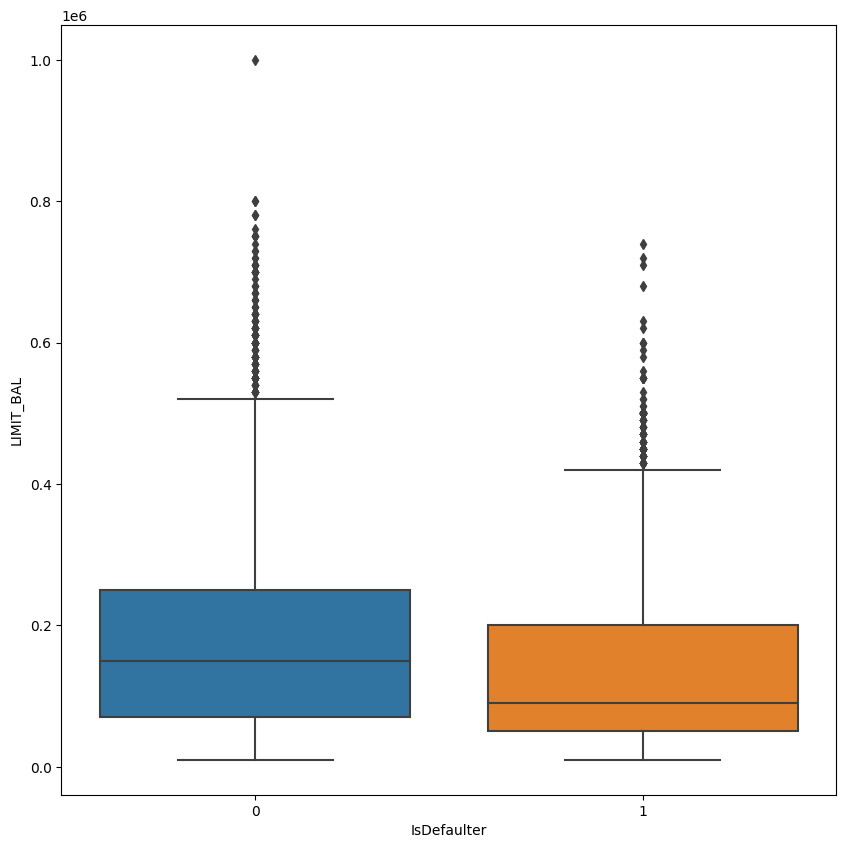

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [ ]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

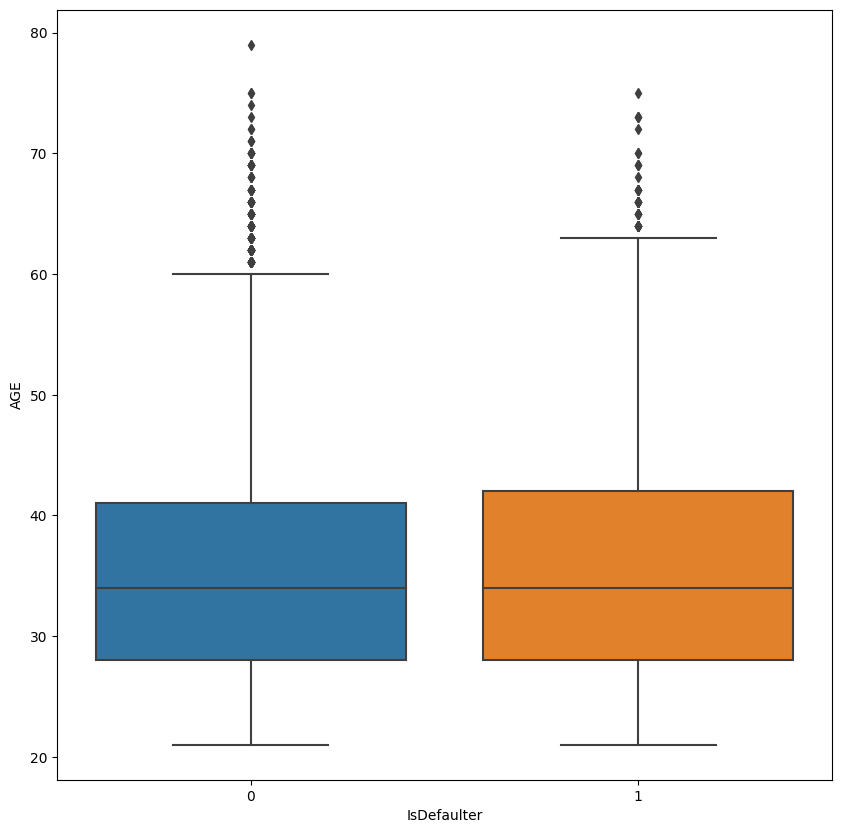

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

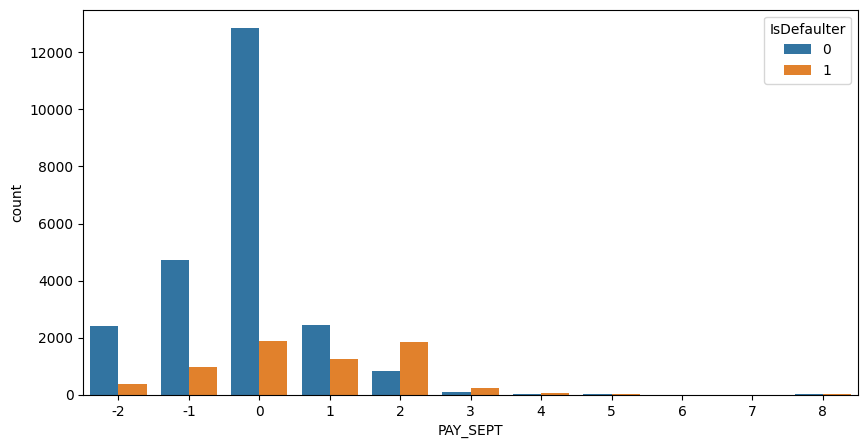

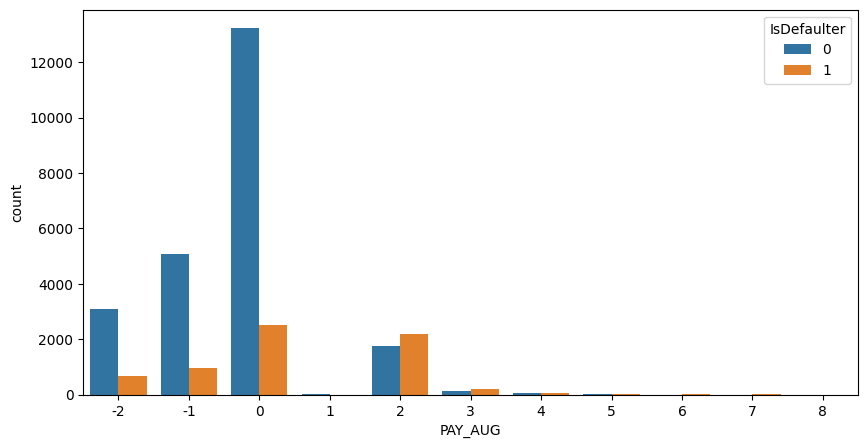

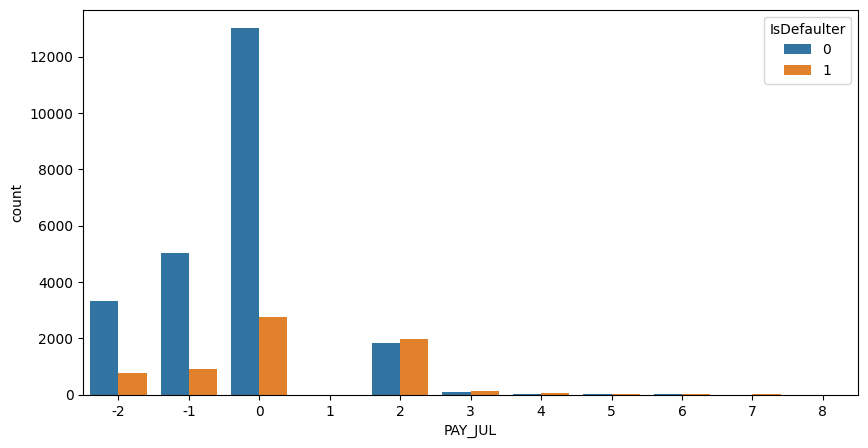

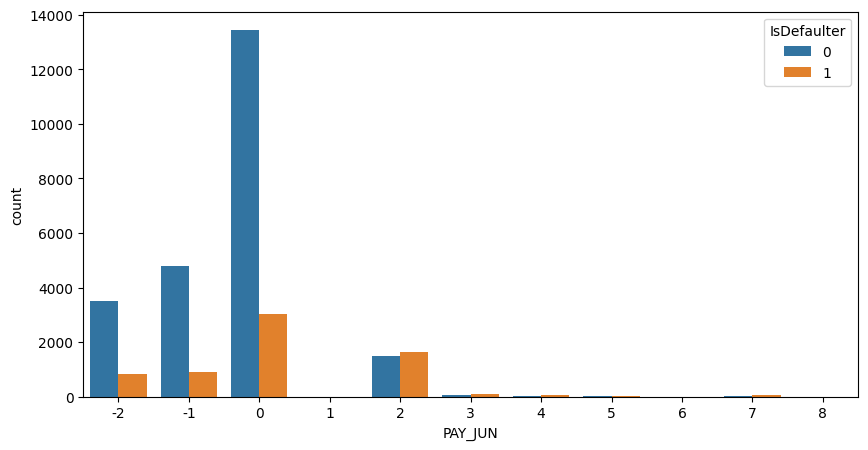

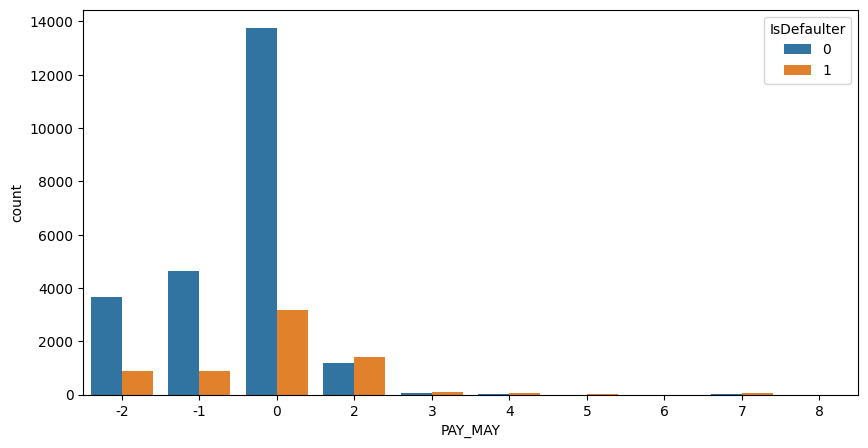

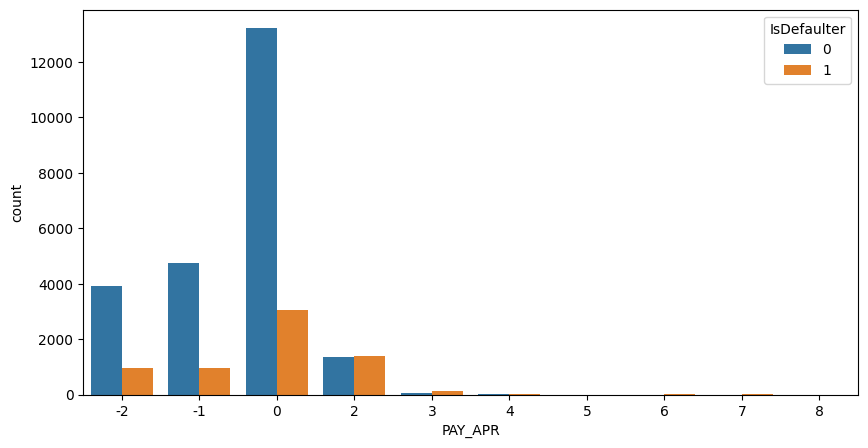

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

In [ ]:
df.shape

(30000, 25)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19474,153981,2,2,1,35,2,2,0,0,...,146800,138533,143077,143069,796,5417,4849,8971,6630,2030
46724,12864,80000,1,1,1,36,2,2,1,1,...,8098,8727,8368,8631,871,387,839,27,484,653
46725,10028,30000,1,2,1,35,0,0,0,0,...,8660,8769,9008,3090,2790,563,223,287,0,117
46726,14736,30000,1,2,2,25,1,1,1,1,...,24360,24997,25526,26196,1973,1407,1341,1131,1236,1302


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'IsDefaulter'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

In [ ]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19474,153981,2,2,1,35,2,2,0,0,...,138533,143077,143069,796,5417,4849,8971,6630,2030,1
46724,12864,80000,1,1,1,36,2,2,1,1,...,8727,8368,8631,871,387,839,27,484,653,1
46725,10028,30000,1,2,1,35,0,0,0,0,...,8769,9008,3090,2790,563,223,287,0,117,1
46726,14736,30000,1,2,2,25,1,1,1,1,...,24997,25526,26196,1973,1407,1341,1131,1236,1302,1


In [ ]:
new_df = balance_df.copy()

In [ ]:
new_df['Payement_Value'] = new_df['PAY_SEPT'] + new_df['PAY_AUG'] + new_df['PAY_JUL'] + new_df['PAY_JUN'] + new_df['PAY_MAY'] + new_df['PAY_APR']

In [ ]:
new_df.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.98014
1    1.62515
Name: Payement_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

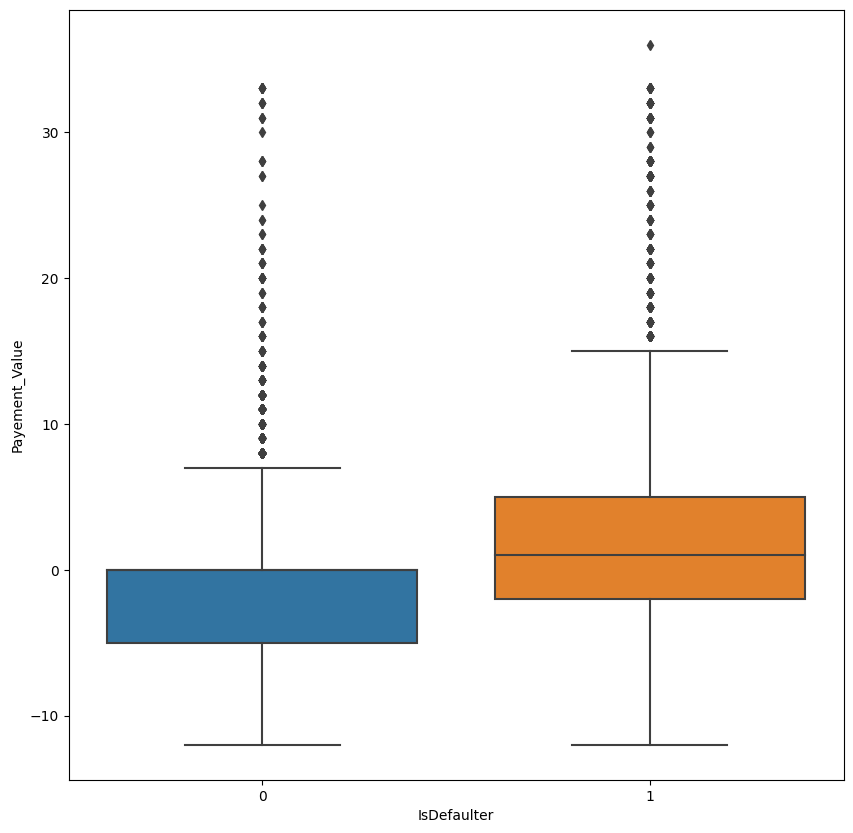

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = new_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
new_df['Dues'] = (new_df['BILL_AMT_APR']+new_df['BILL_AMT_MAY']+new_df['BILL_AMT_JUN']+new_df['BILL_AMT_JUL']+new_df['BILL_AMT_SEPT'])-(new_df['PAY_AMT_APR']+new_df['PAY_AMT_MAY']+new_df['PAY_AMT_JUN']+new_df['PAY_AMT_JUL']+new_df['PAY_AMT_SEPT'])

In [ ]:
new_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    194382.516607
1    196779.904383
Name: Dues, dtype: float64

In [ ]:
new_df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
new_df['EDUCATION']=np.where(new_df['EDUCATION'] == 6, 4,new_df['EDUCATION'])
new_df['EDUCATION']=np.where(new_df['EDUCATION'] == 0, 4, new_df['EDUCATION'])

In [ ]:
new_df['MARRIAGE'].unique()

array([1, 2, 3])

In [ ]:
new_df['MARRIAGE']=np.where(new_df['MARRIAGE'] == 0, 3, new_df['MARRIAGE'])

In [ ]:
new_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE':{1:'married',2:'single',3:'others'}})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,4602
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,11352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,78108
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,176732
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,81301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19474,153981,FEMALE,university,married,35,2,2,0,0,...,143069,796,5417,4849,8971,6630,2030,1,4,708841
46724,12864,80000,MALE,graduate school,married,36,2,2,1,1,...,8631,871,387,839,27,484,653,1,8,38304
46725,10028,30000,MALE,university,married,35,0,0,0,0,...,3090,2790,563,223,287,0,117,1,0,32041
46726,14736,30000,MALE,university,single,25,1,1,1,1,...,26196,1973,1407,1341,1131,1236,1302,1,6,118137


In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,4602
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,11352
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,78108
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,176732
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,81301


In [ ]:
new_df = pd.get_dummies(new_df, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
new_df = new_df.replace(encoders_nums)

In [ ]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_df.drop('ID',axis = 1, inplace = True)

In [ ]:
new_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,2,1,24,3913,3102,689,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,2682,1725,2682,3272,3455,...,0,0,0,1,0,0,0,0,0,0
2,90000,2,2,2,34,29239,14027,13559,14331,14948,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
x = new_df.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = new_df['IsDefaulter']

In [ ]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4',
       'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1',
       'PAY_MAY_0', 'PAY_MAY_1', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4',
       'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
x_train

array([[ 0.47259457, -1.00980669, -1.08603854, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [-0.34848791,  0.99028855,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [ 0.52709567, -1.00980669,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238],
       ...,
       [-1.08144688,  0.99028855, -1.08603854, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [ 0.02042729, -1.00980669,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [-1.06487447, -1.00980669,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238]])

In [ ]:
x_test

array([[ 1.40267924,  0.99028855,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [-0.82607895,  0.99028855, -1.08603854, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [ 0.44749716,  0.99028855,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238],
       ...,
       [ 0.12910313, -1.00980669,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [-0.62997211, -1.00980669, -1.08603854, ..., -0.03585635,
        -0.04167069, -0.00654238],
       [-0.82607895, -1.00980669,  0.34964124, ..., -0.03585635,
        -0.04167069, -0.00654238]])

In [ ]:
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predicted Probability
y_pred_proba_train=regressor.predict_proba(x_train)[:,1]
y_pred_proba_test=regressor.predict_proba(x_test)[:,1]

In [ ]:
# Get the predicted classes
y_pred_train=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)

In [ ]:
# Get the accuracy scores on train data
train_accuracy_lr = round(accuracy_score(y_pred_train,y_train),4)
train_precision_score_lr = round(precision_score(y_pred_train,y_train),4)
train_recall_score_lr = round(recall_score(y_pred_train,y_train),4)
train_f1_score_lr = round(f1_score(y_pred_train,y_train),4)
train_roc_score_lr = round(roc_auc_score(y_pred_train,y_train),4)

In [ ]:
print("The accuracy on train data is ", train_accuracy_lr)
print("The precision score on train data is ", train_precision_score_lr)
print("The recall score on train data is ", train_recall_score_lr)
print("The f1 score on train data is ", train_f1_score_lr)
print("The roc_score on train data is ", train_roc_score_lr)

The accuracy on train data is  0.7499
The precision score on train data is  0.6889
The recall score on train data is  0.7846
The f1 score on train data is  0.7337
The roc_score on train data is  0.7537


In [ ]:
# Get the accuracy scores on test data
test_accuracy_lr = round(accuracy_score(y_pred_test,y_test),4)
test_precision_score_lr = round(precision_score(y_pred_test,y_test),4)
test_recall_score_lr = round(recall_score(y_pred_test,y_test),4)
test_f1_score_lr = round(f1_score(y_pred_test,y_test),4)
test_roc_score_lr = round(roc_auc_score(y_pred_test,y_test),4)

In [ ]:
print("The accuracy on test data is ", test_accuracy_lr)
print("The precision score on test data is ", test_precision_score_lr)
print("The recall score on test data is ", test_recall_score_lr)
print("The f1 score on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7528
The precision score on test data is  0.6944
The recall score on test data is  0.7863
The f1 score on test data is  0.7375
The roc_score on test data is  0.7563


In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(x_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_


In [ ]:
grid_lr_clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_

0.7489967650380048

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(x_train)[:,1]
test_preds = optimized_clf.predict_proba(x_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(x_train)
test_class_preds = optimized_clf.predict(x_test)

In [ ]:
# Get the accuracy scores on train data
train_accuracy_lr_clf = round(accuracy_score(train_class_preds,y_train),4)
train_precision_score_lr_clf = round(precision_score(train_class_preds,y_train),4)
train_recall_score_lr_clf = round(recall_score(train_class_preds,y_train),4)
train_f1_score_lr_clf = round(f1_score(train_class_preds,y_train),4)
train_roc_score_lr_clf = round(roc_auc_score(train_class_preds,y_train),4)

In [ ]:
print("The accuracy on train data is ", train_accuracy_lr_clf)
print("The precision score on train data is ", train_precision_score_lr_clf)
print("The recall score on train data is ", train_recall_score_lr_clf)
print("The f1 score on train data is ", train_f1_score_lr_clf)
print("The roc_score on train data is ", train_roc_score_lr_clf)

The accuracy on train data is  0.7499
The precision score on train data is  0.6889
The recall score on train data is  0.7846
The f1 score on train data is  0.7337
The roc_score on train data is  0.7537


In [ ]:
# Get the accuracy scores on test data
test_accuracy_lr_clf = round(accuracy_score(test_class_preds,y_test),4)
test_precision_score_lr_clf = round(precision_score(test_class_preds,y_test),4)
test_recall_score_lr_clf = round(recall_score(test_class_preds,y_test),4)
test_f1_score_lr_clf = round(f1_score(test_class_preds,y_test),4)
test_roc_score_lr_clf = round(roc_auc_score(test_class_preds,y_test),4)

In [ ]:
print("The accuracy on test data is ", test_accuracy_lr_clf)
print("The precision score on test data is ", test_precision_score_lr_clf)
print("The recall score on test data is ", test_recall_score_lr_clf)
print("The f1 score on test data is ", test_f1_score_lr_clf)
print("The roc_score on test data is ", test_roc_score_lr_clf)

The accuracy on test data is  0.7528
The precision score on test data is  0.6944
The recall score on test data is  0.7863
The f1 score on test data is  0.7375
The roc_score on test data is  0.7563


[[15156  3535]
 [ 5814 12877]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

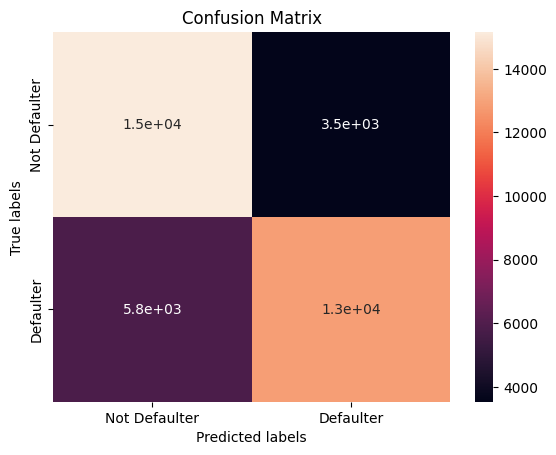

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(x_test)[::,1]

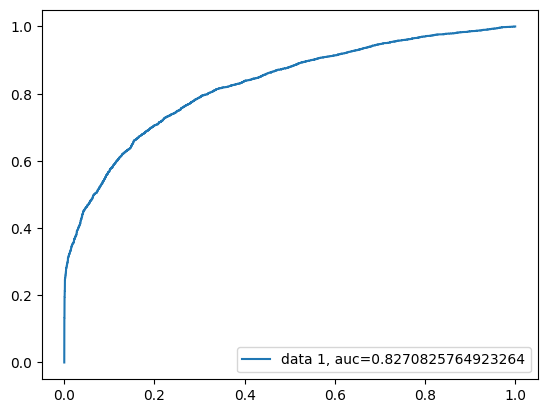

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr,_= roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_train_pred_dtc=dtc.predict(X_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 4)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 4)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 4)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 4)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 4)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 4)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.9993
The accuracy on test data is  0.7488
The precision on test data is  0.7663
The recall on test data is  0.7403
The f1 on test data is  0.7531
The roc_score on test data is  0.7491


[[3417 1256]
 [1092 3581]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

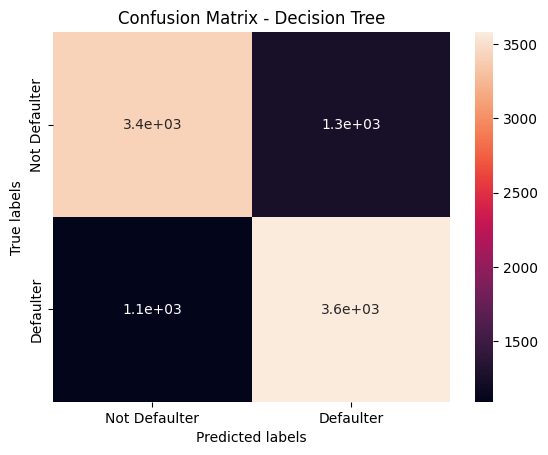

In [ ]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_train_pred_rfc=rfc.predict(x_train)
y_pred_rfc=rfc.predict(x_test)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 4)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 4)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 4)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 4)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 4)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 4)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.9992
The accuracy on test data is  0.8434
The precision on test data is  0.81
The recall on test data is  0.8679
The f1 on test data is  0.8379
The roc_score on test data is  0.8449


[[4097  576]
 [ 888 3785]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

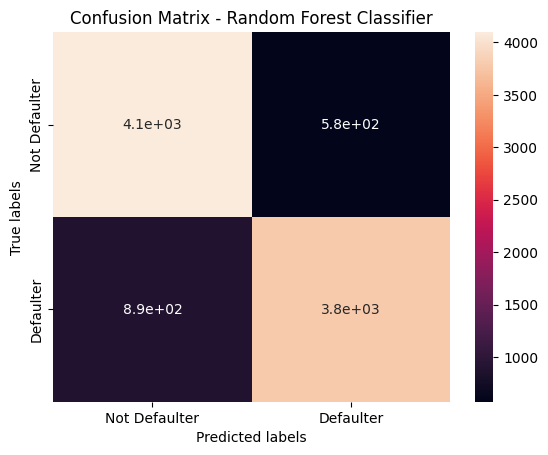

In [115]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)